# Image Combination

*J. Runnoe* <br>
*September, 2023*

This notebook will take you through the steps to interact with real imaging data and practice methods for combining images. Many of these tasks are reflected in the [astropy CCD reduction and photometry guide](https://github.com/astropy/ccd-reduction-and-photometry-guide/tree/main), so reading those notebooks can be very helpful.

---
## Contents
* [Setup](#setup)
    * [Install DS9](#ds9)
    * [Get Imaging Data](#data)
    * [Install Python Packages](#python)
* [Exercises](#exercises)
* [Summary](#summary)

## Setup <a class="anchor" id="setup"></a>

### Install DS9 <a class="anchor" id="ds9"></a>

Astronomer's have developed a handy tool for inspecting and manipulating images stored in [`fits`](https://fits.gsfc.nasa.gov/fits_standard.html) files: DS9. You should [download DS9](https://sites.google.com/cfa.harvard.edu/saoimageds9) and install it on your computer. If you have any trouble with the previous link, you can find the direct download for your operaty system [here](https://ds9.si.edu/download/).

### Get Imaging Data <a class="anchor" id="data"></a>

We will use a real photometric data set for imaging data reduction in this class. We will use the same data set for these exercises, so you should download it now. This is something that you should store on your computer, but <font color='red'>do not add it to the class Git repository!</font>

[Download the imaging data set](https://www.dropbox.com/sh/u2mce0afty9gin1/AAAhhOPrSQqr_WggG4tHUuj8a?dl=0), it is ~2.6GB.

### Install Python packages <a class="anchor" id="python"></a>

You won't need these today, but they will be useful going forward with data reduction. Thus, do this before next week. If you didn't get any of these when you set up your class Python environment, install the following packages: <br>
    `$ conda install -c astropy ccdproc photutils ipywidgets matplotlib` <br>

## Exercises <a class="anchor" id="exercises"></a>

In the following exercises, you will practice inspecting images in DS9 and interacting with them in Python. The tools you develop in these exercises will be useful for data reduction assignments coming up.

For more information, read notebooks 01-01 to 01-06 from the [CCD reduction guide](https://github.com/astropy/ccd-reduction-and-photometry-guide/tree/main).

In [3]:
# import block
import numpy as np
from astropy.io import fits

from matplotlib import pyplot as plt
%matplotlib inline
#from matplotlib import rc

from astropy.visualization import hist
#from astropy.stats import mad_std

#from ccdproc import ImageFileCollection

In [1]:
# set your data directory
# this should point to the Imaging directory on your computer
data_dir = '/Users/blakeghg/Documents/Work/Courses!/Observational_Methods/Imaging/'


1. In DS9, open and display a bias, flat, dark frame. Play with scaling and cursor options. You can identify which filenames are associated with these different kinds of exposures by reading the `log.txt` file that comes with the data. 

2. Now open and display one of the images in Python. The [`astropy.io.fits`](https://docs.astropy.org/en/stable/io/fits/) package is one way of opening fits files. You can open a fits file like this:

```python
hdu = fits.open('filename')
hdr = hdu[0].header
img = hdu[0].data
```

You may need to experiment with the extension (i.e. the number 0 in the code above) to see where the data are stored. Then, a handy code snippet for plotting:

```python
fig = plt.subplots(1,1,figsize=(4,4))
plt.imshow(img, vmin=min_level, vmax=max_level)
plt.xticks([])
plt.yticks([])
plt.title('Title')
plt.grid(False)
plt.show()
```

In [4]:
hdu = fits.open(data_dir + 'a238.fits')
hdr = hdu[0].header
img = hdu[0].data

3. Figure out how to select a single column, a single row, and a range of columns or rows from this image. Try looking at the image shape for a clue.

In [14]:
img.shape

(2048, 2200)

In [15]:
img.dtype.name

'uint16'

In [16]:
img[30:40, 10:20]

array([[674, 678, 673, 696, 692, 680, 682, 674, 656, 681],
       [684, 675, 675, 685, 694, 678, 674, 686, 685, 680],
       [678, 702, 679, 675, 677, 680, 694, 681, 678, 682],
       [675, 680, 663, 681, 681, 676, 680, 691, 678, 683],
       [673, 680, 680, 678, 685, 676, 680, 681, 674, 671],
       [664, 670, 678, 677, 679, 670, 681, 681, 692, 680],
       [677, 676, 685, 683, 678, 674, 683, 701, 681, 677],
       [681, 678, 672, 672, 679, 682, 672, 677, 686, 677],
       [680, 677, 681, 680, 674, 653, 680, 682, 681, 683],
       [679, 647, 678, 678, 682, 681, 661, 687, 678, 680]], dtype=uint16)

In [20]:
# Printing a row by fixing the row index and varying the column index
print(img[0, :])

[  0 699 700 ... 677 679 676]


In [21]:
# Printing a column of the image data (since the y coordinate is first in the indexing)
print(img[:, 0])

[  0 671 684 ... 686 683 693]


In [ ]:
print(img[0:5,0:5])
# Huzzah! I got it right!!!

[[  0 699 700 688 672]
 [671 694 650 683 661]
 [684 679 659 694 645]
 [674 680 652 705 667]
 [678 676 653 688 679]]


4. Plot the value of pixels in an individual column or row as a function of pixel number.

In [42]:
from astropy.visualization import ZScaleInterval, ImageNormalize
interval = ZScaleInterval()
vmin, vmax = interval.get_limits(img)
print(vmin, vmax)

663.711604533213 765


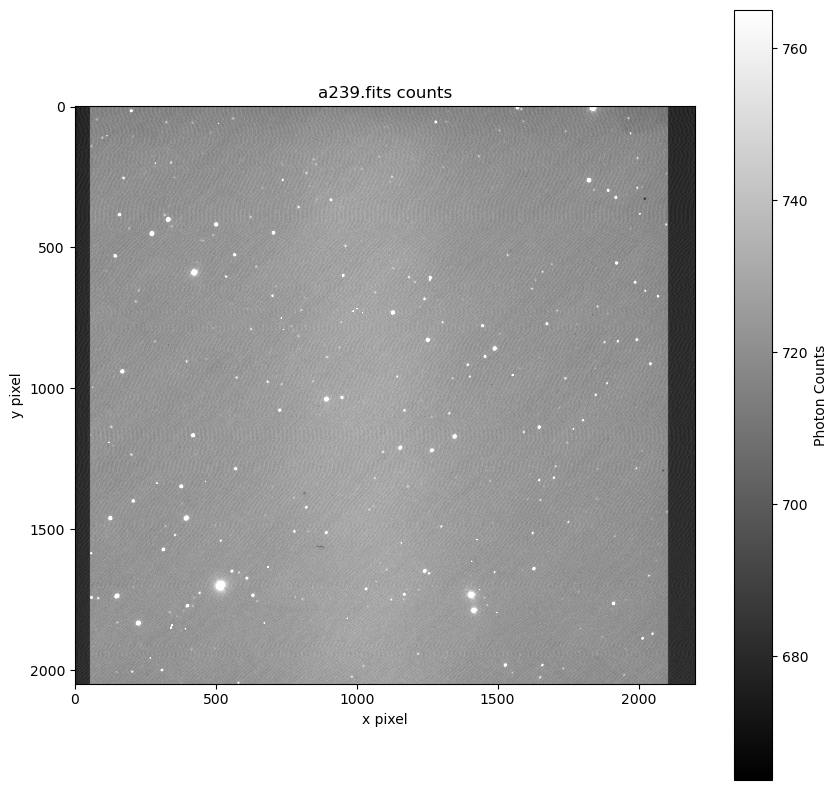

In [43]:
fig = plt.subplots(1,1,figsize=(10,10))
plt.imshow(img, vmin=vmin, vmax=vmax, cmap='gray')
plt.xticks(np.arange(0, 2200, step=500))
plt.yticks(np.arange(0, 2048, step=500))
plt.xlabel('x pixel')
plt.ylabel('y pixel')
plt.title('a239.fits counts')
plt.colorbar(label='Photon Counts')
plt.grid(False)
plt.show()

5. Plot a histogram of the values in a bias and a flat. One way of plotting histograms (there are many!):

```python

bins = np.histogram_bin_edges(bias, bins=N_bins, range=[low_limit,hi_limit])

plt.figure(figsize=(6,6))
hist(image.flatten(), bins=bins, alpha=0.5, label='bias',rwidth=1)
plt.legend()
plt.xlim([low_limit,hi_limit])
plt.xlabel('Counts')
plt.ylabel('Number of pixels')
plt.show()
```

27085.989013241255 44618


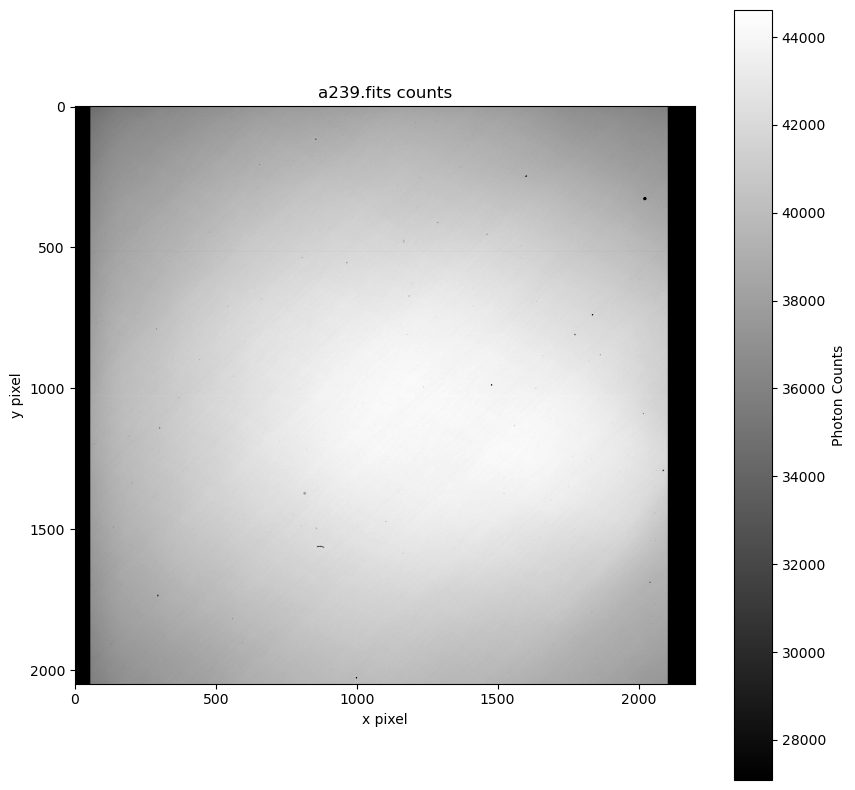

In [45]:
# Note that from log.txt, bias files are a093-111, and then the flats are a005-10
flat1 = fits.open(data_dir + 'a005.fits')
flat1_hdr = flat1[0].header
flat1_img = flat1[0].data

interval_flat1 = ZScaleInterval()
vmin_flat1, vmax_flat1 = interval_flat1.get_limits(flat1_img)
print(vmin_flat1, vmax_flat1)

fig = plt.subplots(1,1,figsize=(10,10))
plt.imshow(flat1_img, vmin=vmin_flat1, vmax=vmax_flat1, cmap='gray')
plt.xticks(np.arange(0, 2200, step=500))
plt.yticks(np.arange(0, 2048, step=500))
plt.xlabel('x pixel')
plt.ylabel('y pixel')
plt.title('a239.fits counts')
plt.colorbar(label='Photon Counts')
plt.grid(False)
plt.show()

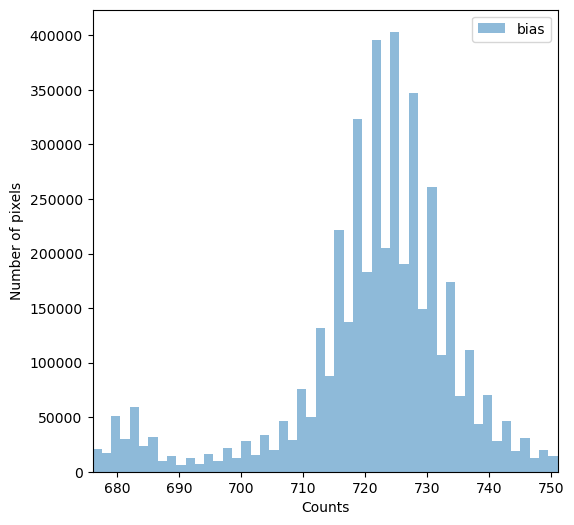

In [ ]:
hdu = fits.open(data_dir + 'a238.fits')

bias1 = img.flatten()
low_limit1 = np.percentile(bias1, 1)
hi_limit1 = np.percentile(bias1, 99)
bins1 = np.histogram_bin_edges(bias1, bins=50, range=[low_limit1,hi_limit1])

plt.figure(figsize=(6,6))
hist(bias1, bins=bins1, alpha=0.5, label='bias',rwidth=1)
plt.legend()
plt.xlim([low_limit1,hi_limit1])
plt.xlabel('Counts')
plt.ylabel('Number of pixels')
plt.show()

6. Choose at least 3 biases and mean and median combine them to create two master biases. Evaluate (with difference imaging and by plotting the distribution of their values on the same histogram) which is preferred. A handy method for combining frames is to do the following:

```python
combined_image = np.mean([img1,img2,img3],axis=0)
```

This stacks the frames, with shape (3,2048,2200) and axis=0 takes the mean of each pixel in the image.

In [ ]:
# avging choice matters! (mean, median, etc). (WHAT SHE WANTS IS TO CREATE TWO COMBINED IMAGES WITH TWO DIFFERENT AVERAGING METHODS, THEN COMPARE THE HISTOGRAMS OF THE COMBINED IMAGES TO THE HISTOGRAM OF THE ORIGINAL IMAGE. THIS IS TO SHOW HOW DIFFERENT AVERAGING METHODS CAN AFFECT THE HISTOGRAM OF THE COMBINED IMAGE, AND HOW THIS CAN AFFECT THE QUALITY OF THE FINAL IMAGE.) 
# ASK JESSIE ON TUESDAY!!!

bias2 = img.flatten()
low_limit2 = np.percentile(bias2, 5)
hi_limit2 = np.percentile(bias2, 95)
bins2 = np.histogram_bin_edges(bias2, bins=50, range=[low_limit2,hi_limit2])

bias3 = img.flatten()
low_limit3 = np.percentile(bias3, 13)
hi_limit3 = np.percentile(bias3, 87)
bins3 = np.histogram_bin_edges(bias3, bins=50, range=[low_limit3,hi_limit3])

combined_image = np.mean([bias1,bias2,bias3],axis=0)


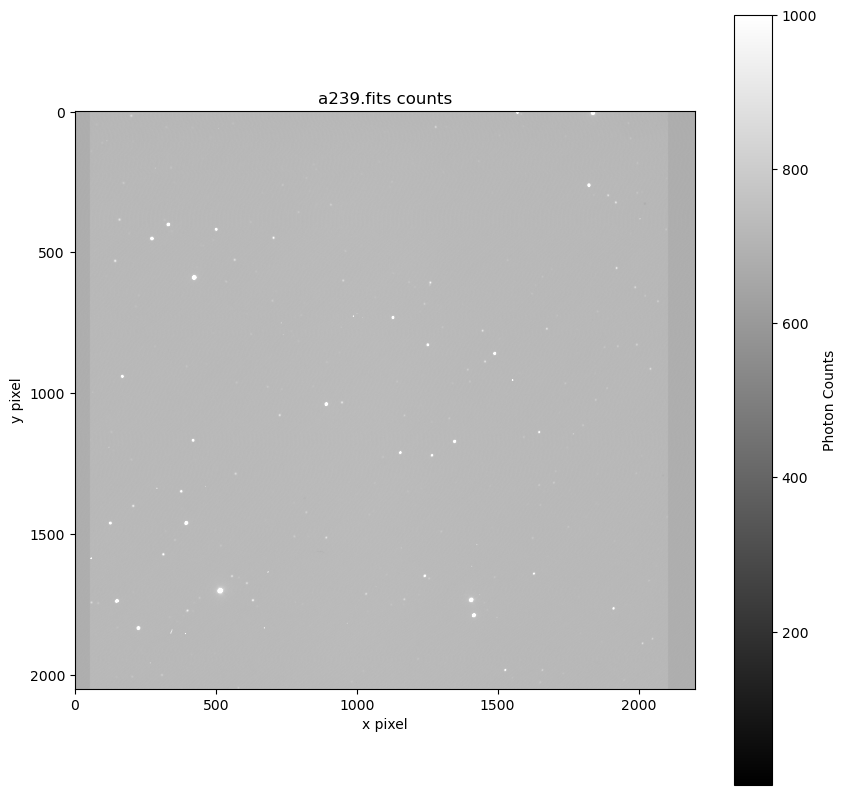

In [41]:
fig = plt.subplots(1,1,figsize=(10,10))
plt.imshow(combined_image.reshape(img.shape), vmin=1, vmax=1000, cmap='gray')
plt.xticks(np.arange(0, 2200, step=500))
plt.yticks(np.arange(0, 2048, step=500))
plt.xlabel('x pixel')
plt.ylabel('y pixel')
plt.title('a239.fits counts')
plt.colorbar(label='Photon Counts')
plt.grid(False)
plt.show()

---
## Summary <a class="anchor" id="summary"></a>

At this point, all of you should have:
* Installed DS9 on your computer.
* Downloaded the Imaging data set for this class.
* Learned to inspect images in DS9.
* Learned to open and display images in Python and manipulate them.
* Practiced and evaluated methods for combining images in Python.